In [1]:
import scanpy as sc
import pandas as pd

from collections import defaultdict
from scipy.stats import mannwhitneyu
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
from sccoda.util import comp_ana as mod
from sccoda.util import cell_composition_data as dat
from sccoda.util import data_visualization as viz

In [2]:
adata = sc.read_mtx('/ahg/regevdata/projects/Pancreas/src/data/peng/out.matrix.mtx')

In [7]:
genes = pd.read_csv('/ahg/regevdata/projects/Pancreas/src/data/peng/out.genes.tsv', header=None)[0]
barcodes = pd.read_csv('/ahg/regevdata/projects/Pancreas/src/data/peng/out.barcodes.tsv', header=None)[0]

In [10]:
adata = sc.AnnData(adata.X.T)

In [11]:
adata.var_names = genes
adata.obs_names = barcodes

In [17]:
adata.obs['pid'] = list(pd.read_csv('/ahg/regevdata/projects/Pancreas/src/data/peng/samples.csv', header=0)['x'])
adata.obs['seurat'] = list(pd.read_csv('/ahg/regevdata/projects/Pancreas/src/data/peng/seurat.csv', header=0)['x'])

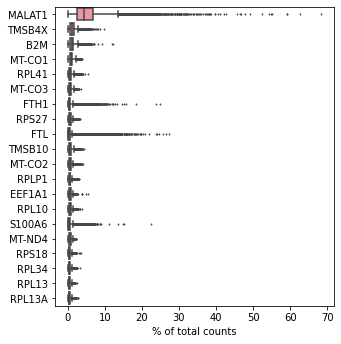

In [22]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [23]:
adata.var_names_make_unique()

In [24]:
sc.pp.filter_cells(adata, min_genes=0)
sc.pp.filter_genes(adata, min_cells=0)

In [25]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

... storing 'sample' as categorical
... storing 'pid' as categorical


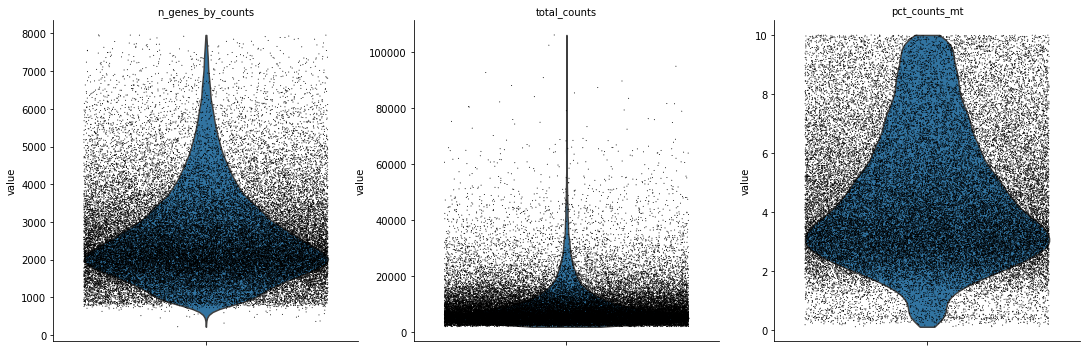

In [26]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

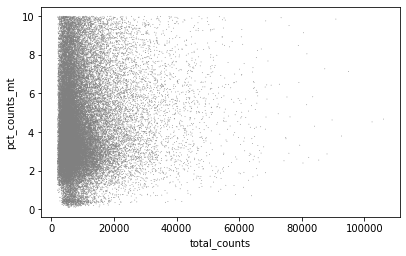

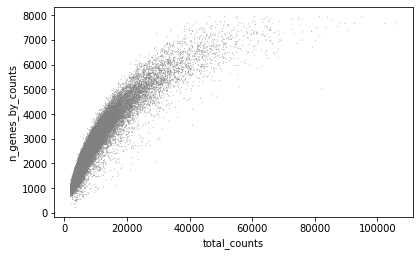

In [27]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [28]:
sc.pp.normalize_total(adata, target_sum=1e4)

In [29]:
sc.pp.log1p(adata)

In [49]:
sc.pp.highly_variable_genes(adata, batch_key='pid', n_top_genes=2000)

/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


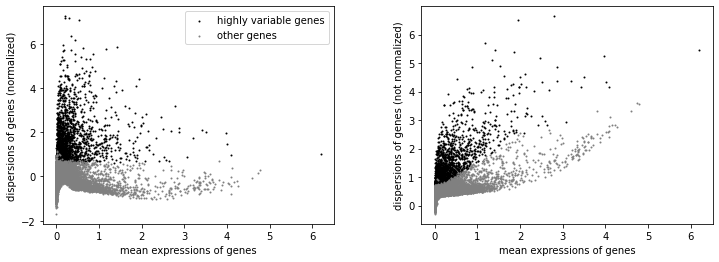

In [50]:
sc.pl.highly_variable_genes(adata)

In [51]:
sc.tl.pca(adata, svd_solver='arpack')

/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


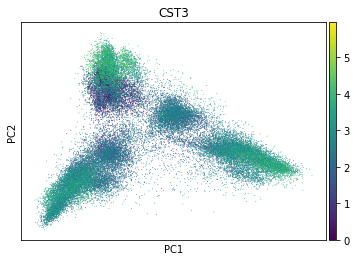

In [52]:
sc.pl.pca(adata, color='CST3')

In [35]:
from harmony import harmonize

In [53]:
Z = harmonize(adata.obsm['X_pca'], adata.obs, batch_key='pid')
adata.obsm['X_harmony'] = Z
sc.pp.neighbors(adata, use_rep='X_harmony')

	Initialization is completed.
	Completed 1 / 10 iteration(s).
	Completed 2 / 10 iteration(s).
	Completed 3 / 10 iteration(s).
	Completed 4 / 10 iteration(s).
	Completed 5 / 10 iteration(s).
	Completed 6 / 10 iteration(s).
	Completed 7 / 10 iteration(s).
	Completed 8 / 10 iteration(s).
	Completed 9 / 10 iteration(s).
	Completed 10 / 10 iteration(s).


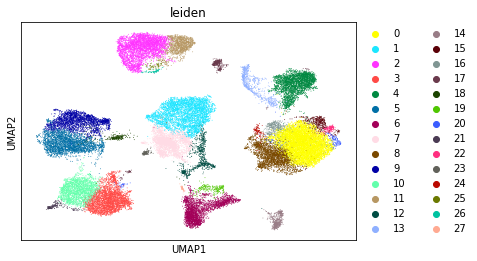

In [54]:
sc.tl.leiden(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color='leiden')

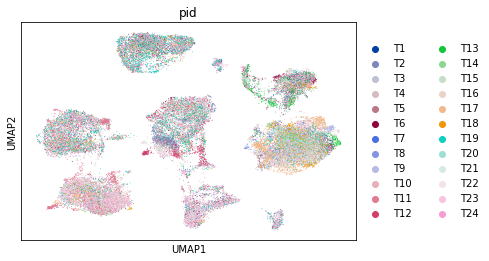

In [55]:
sc.pl.umap(adata, color='pid')

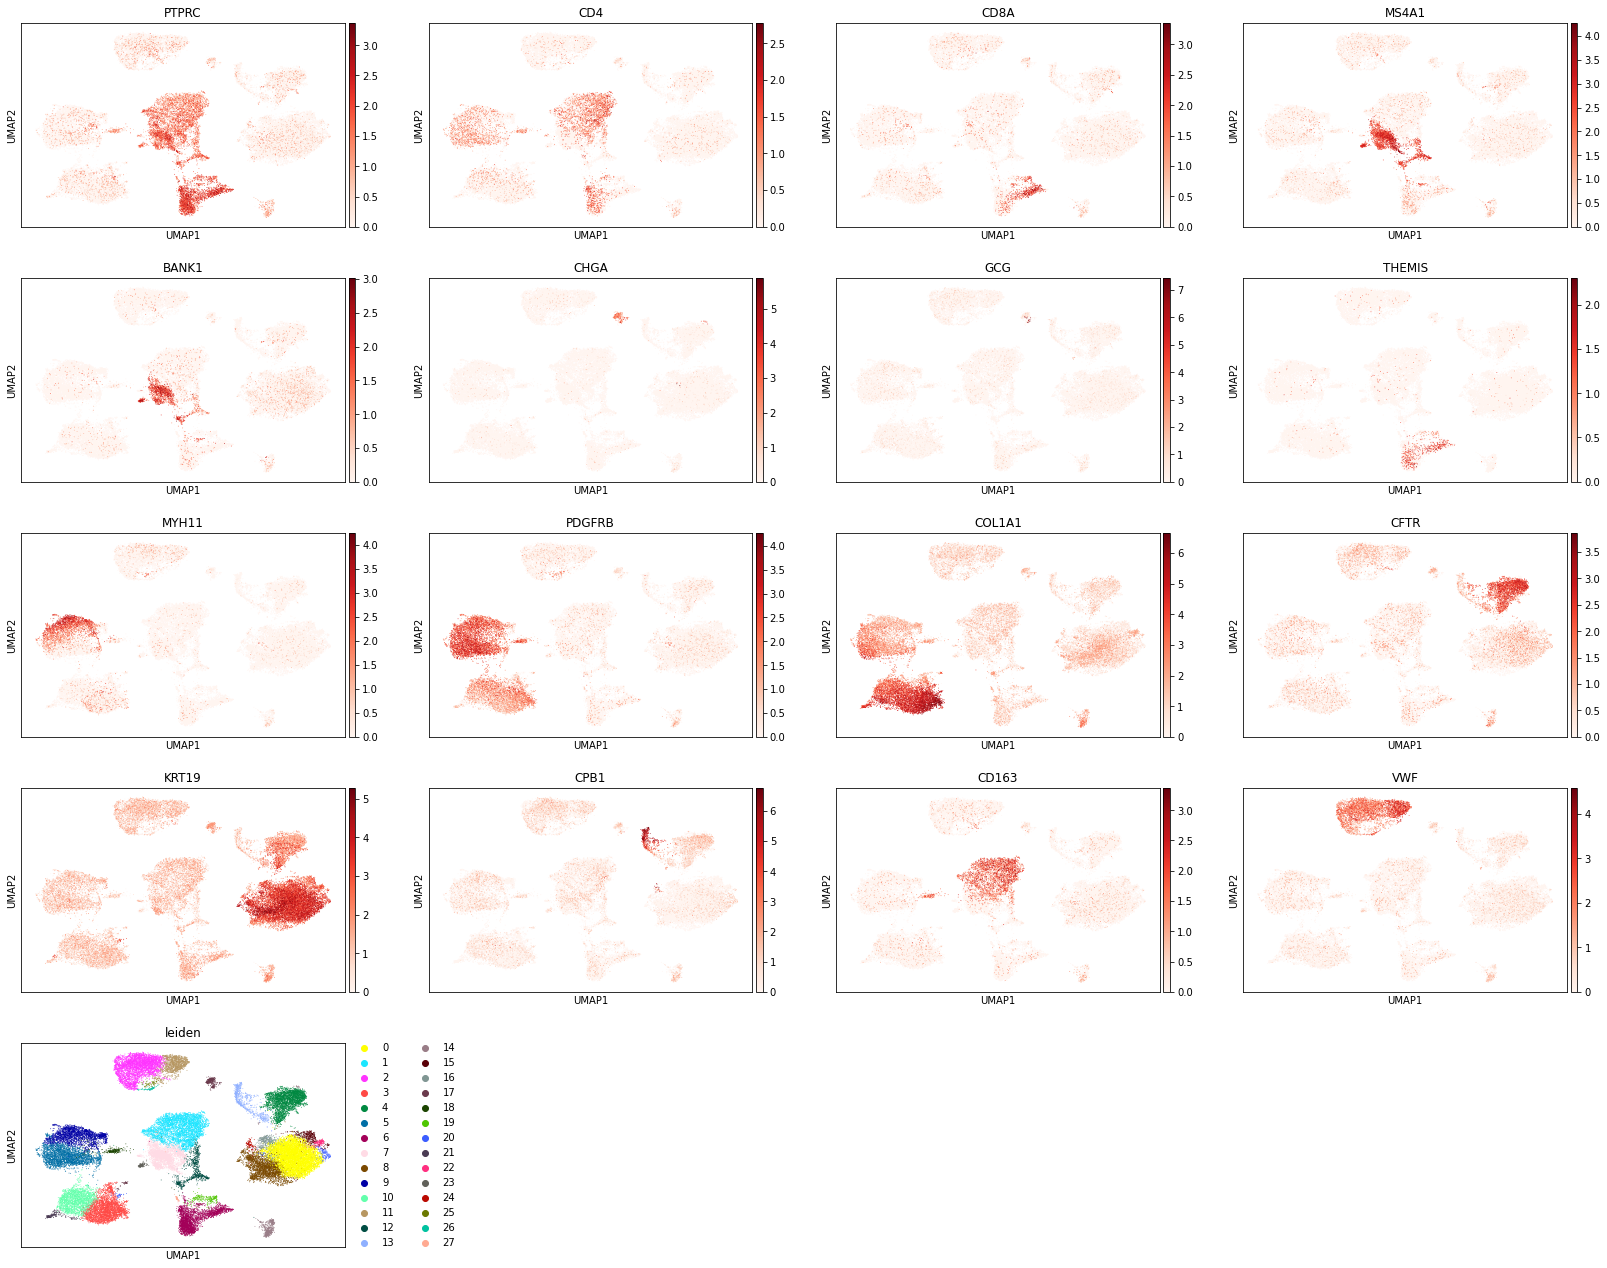

In [64]:
sc.pl.umap(adata, color=['PTPRC', 'CD4', 'CD8A','MS4A1', 'BANK1', 'CHGA', 'GCG', 'THEMIS', 'MYH11', 'PDGFRB', 'COL1A1', 'CFTR', 'KRT19', 'CPB1', 'CD163', 'VWF', 'leiden'], color_map='Reds')

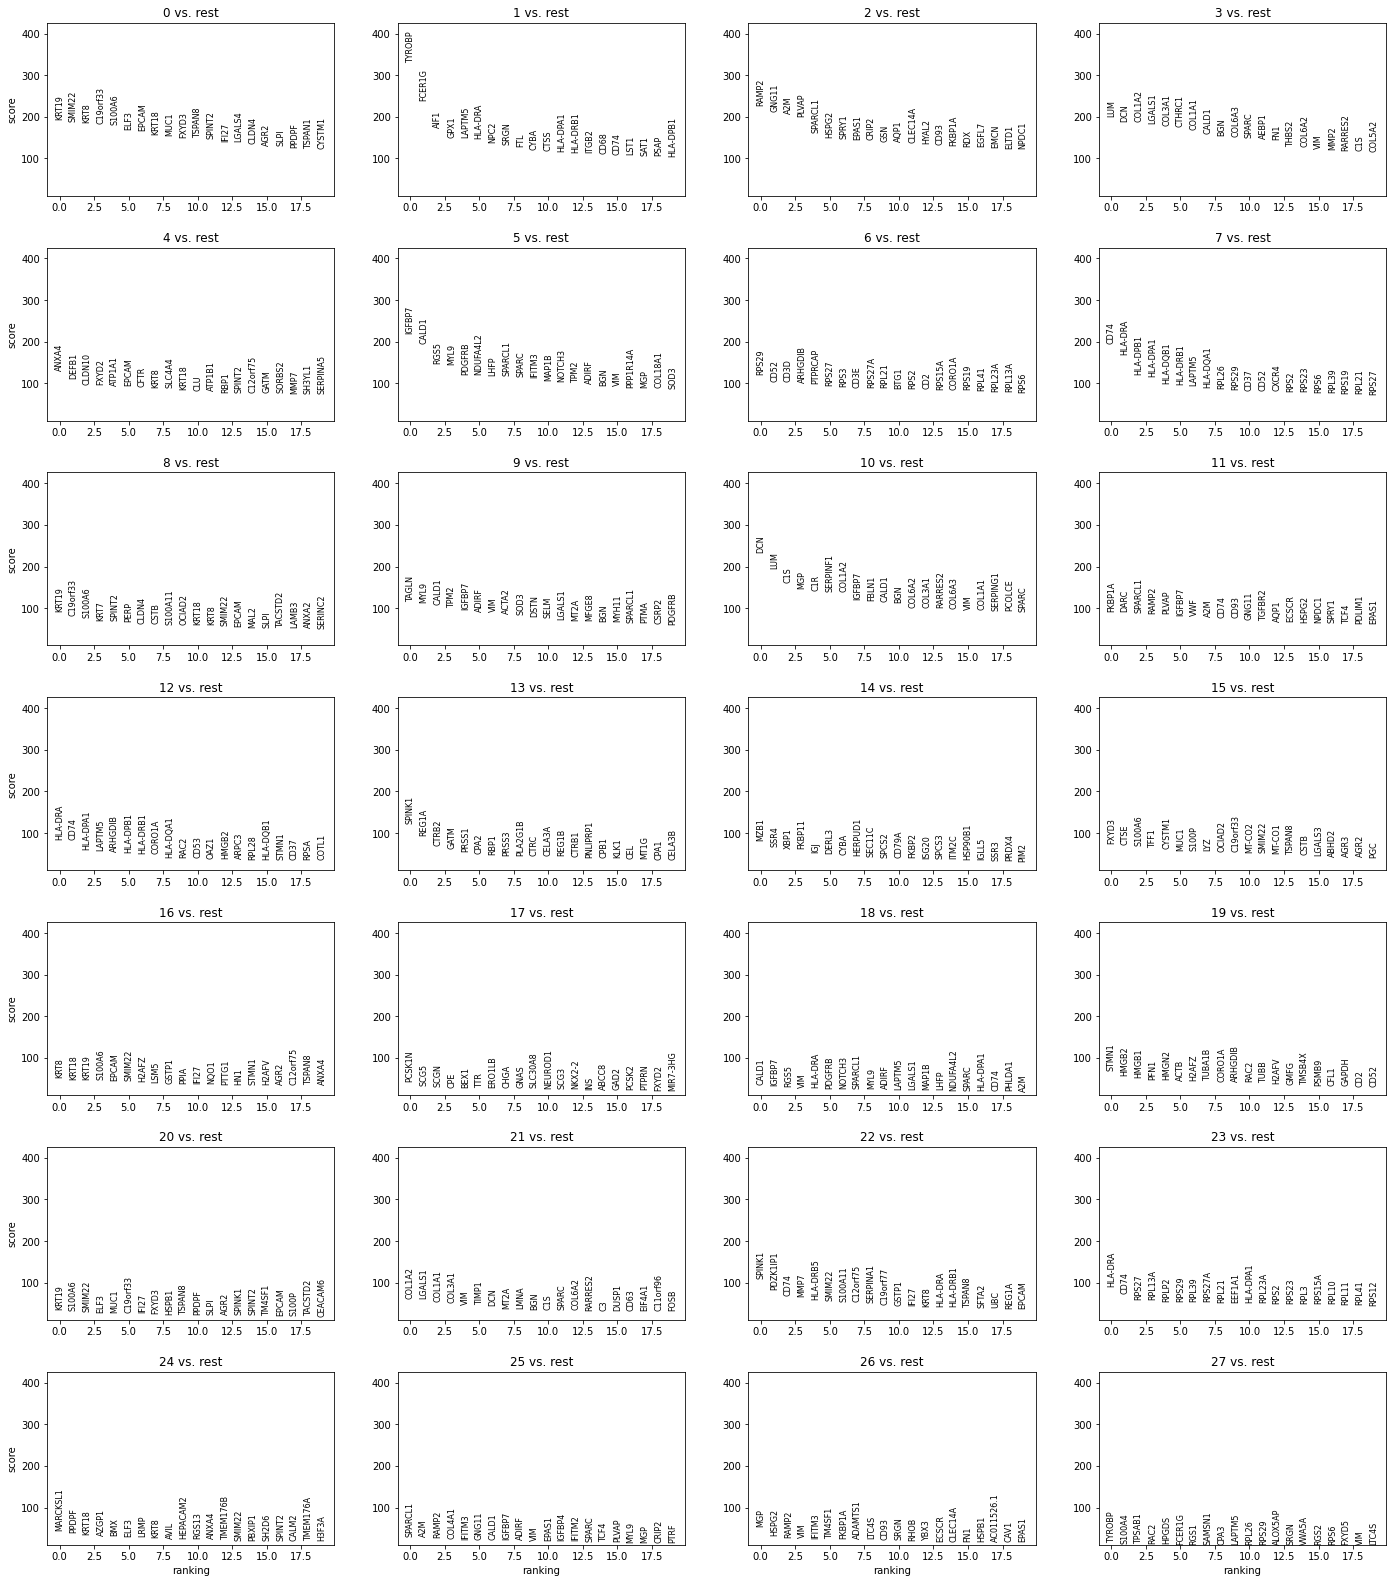

In [65]:
sc.tl.rank_genes_groups(adata, groupby='leiden')
sc.pl.rank_genes_groups(adata)

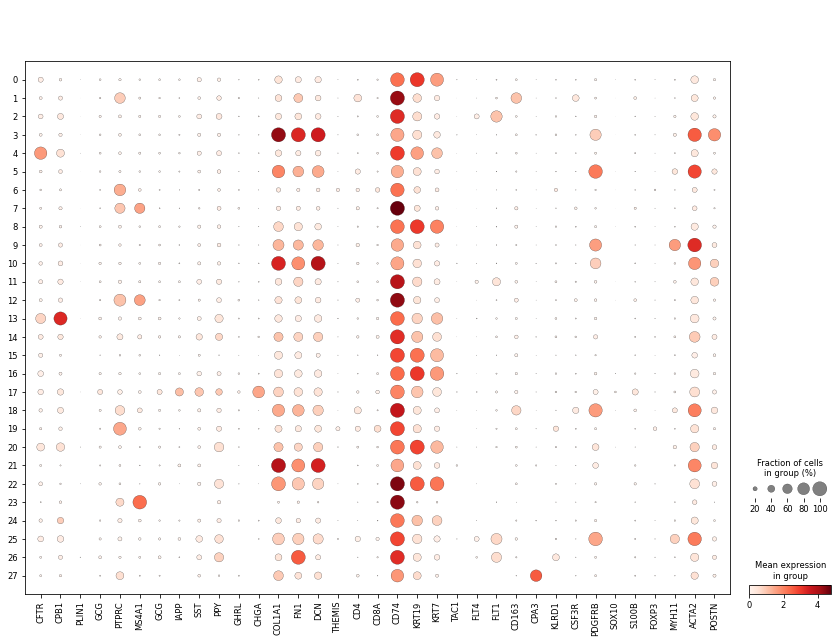

In [68]:
sc.pl.dotplot(adata, groupby='leiden', var_names='CFTR,CPB1,PLIN1,GCG,PTPRC,MS4A1,GCG,IAPP,SST,PPY,GHRL,CHGA,COL1A1,FN1,DCN,THEMIS,CD4,CD8A,CD74,KRT19,KRT7,TAC1,FLT4,FLT1,CD163,CPA3,KLRD1,CSF3R,PDGFRB,SOX10,S100B,FOXP3,MYH11,ACTA2,POSTN'.split(','))



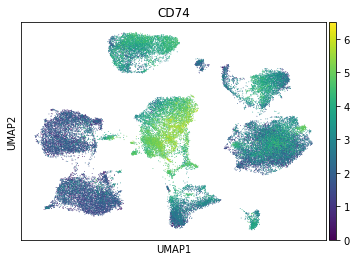

In [70]:
sc.pl.umap(adata, color='CD74'.split(','))


In [71]:
adata.write('/ahg/regevdata/projects/Pancreas/src/data/peng/peng.h5ad')

In [3]:
adata = sc.read('/ahg/regevdata/projects/Pancreas/src/data/peng/peng.h5ad')

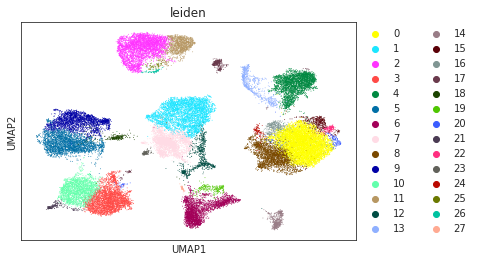

In [4]:
sc.pl.umap(adata, color='leiden')

In [5]:
celltypes = {'0': 'Malignant',
'1': 'Macrophage',
'2': 'Endothelial',
'3': 'Cancer-associated fibroblast',
'4': 'Ductal',
'5': 'Vascular smooth muscle',
'6': 'CD8+ T',
'7': 'B',
'8': 'Malignant',
'9': 'Vascular smooth muscle',
'10': 'CAF',
'11': 'Endothelial',
'12': 'B',
'13': 'Acinar/ADM',
'14': 'Plasma',
'15': 'Malignant',
'16': 'Malignant',
'17': 'Endocrine',
'18': 'Doublet',
'19': 'Treg',
'20': 'Doublet',
'21': 'CAF',
'22': 'Doublet',
'23': 'B',
'24': 'Malignant',
'25': 'Pericyte',
'26': 'Doublet',
'27': 'Mast',}

In [6]:
celltype_labels = []
for leiden in adata.obs.leiden:
    celltype_labels.append(celltypes.get(leiden))
adata.obs['celltypes'] = celltype_labels

In [7]:
celltypes = {'0': 'Epithelial (malignant)',
'1': 'Myeloid',
'2': 'Endothelial',
'3': 'Cancer-associated fibroblast',
'4': 'Epithelial (non-malignant)',
'5': 'Vascular smooth muscle',
'6': 'Lymphoid',
'7': 'Lymphoid',
'8': 'Epithelial (malignant)',
'9': 'Vascular smooth muscle',
'10': 'Cancer-associated fibroblast',
'11': 'Endothelial',
'12': 'Lymphoid',
'13': 'Epithelial (non-malignant)',
'14': 'Lymphoid',
'15': 'Epithelial (malignant)',
'16': 'Epithelial (malignant)',
'17': 'Endocrine',
'18': 'Doublet',
'19': 'Lymphoid',
'20': 'Doublet',
'21': 'Cancer-associated fibroblast',
'22': 'Doublet',
'23': 'Lymphoid',
'24': 'Epithelial (malignant)',
'25': 'Pericyte',
'26': 'Doublet',
'27': 'Myeloid',}

celltype_labels = []
for leiden in adata.obs.leiden:
    celltype_labels.append(celltypes.get(leiden))
adata.obs['Level 1 Annotation'] = celltype_labels

... storing 'celltypes' as categorical
... storing 'Level 1 Annotation' as categorical


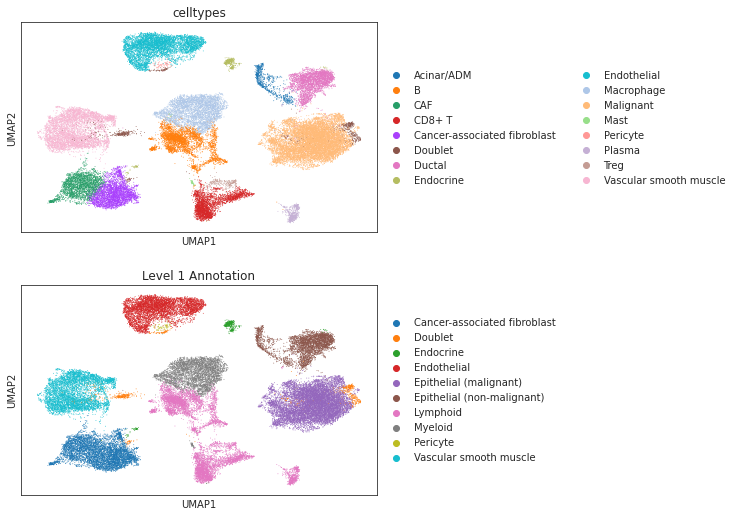

In [8]:
sc.pl.umap(adata, color=['celltypes', 'Level 1 Annotation'], ncols=1)

In [9]:
from collections import Counter
import pandas as pd

In [10]:
datas = []
pids = list(set(adata.obs.pid))
for ct in pids:
    subset = adata[adata.obs['pid']==ct]
    datas.append(pd.DataFrame(Counter(subset.obs['Level 1 Annotation']), index=[0]))

In [11]:
datas = pd.concat(datas).fillna(0)

In [12]:
datas.index= pids

In [13]:
datas.to_csv('/ahg/regevdata/projects/Pancreas/src/data/peng/celltypes.tsv', sep='\t')

In [14]:
peng_df = datas.reset_index().melt(id_vars='index')
peng_df['source'] = ['peng']*peng_df.shape[0]
peng_df.columns = ['pid','variable','value','source']

In [15]:
combinenaivedata = sc.read("/ahg/regevdata/projects/Pancreas/cellbender/processed/totaldata-clean-infercnv-annotated.h5ad")
other_topics  = ['CRTln', 'CRTn', 'CRTx', 'GART', 'RT']
combinenaivedata.obs['new_treatment'] = ['Other' if treatment in other_topics else treatment for treatment in combinenaivedata.obs.treatment_status]

combinenaivedata = combinenaivedata[combinenaivedata.obs['new_treatment']!='Healthy']
combinenaivedata = combinenaivedata[combinenaivedata.obs['Level 1 Annotation']!='REMOVE']
combinenaivedata = combinenaivedata[combinenaivedata.obs['Level 1 Annotation']!='None']

pid_transform = {'MGH2675':'T13',
                 '003':'U15',
                 '004':'U18',
                 '007':'U2',
                 '008':'T22',
                 '009':'T20',
                '010T':'U12',
                '011':'U9',
                '2083':'T4',
                '2100':'T2',
                '2223':'T17',
                '2229':'T18',
                '2276':'U4',
                '2364':'U5',
                '2376':'U1',
                '2443':'U10',
                '2462':'T16',
                '2490':'U11',
                '2498':'U7',
                '2507':'T25',
                '2523':'U3',
                '2540':'T6',
                '2591':'U13',
                '2603':'U6',
                '2626':'U16',
                '2634':'T5',
                '2664':'U14',
                '2667':'T23',
                '2668':'T7',
                '2675':'T13',
                'MGH2076':'T9',
                'MGH2101':'T8',
                'MGH2381':'T19',
                'MGHR1':'T14',
                'MGHR2':'T15',
                'MGHR3':'T3',
                'MGHR5':'T1',
                'MGHR6':'T10',
                'MGHR7':'T12',
                'MGHR8':'T24',
                'MGHR9':'T21',
                'MGHR11':'T11',
                'MGHR16':'U17',
                'MGHR17':'U8'}

combinenaivedata.obs['pid'] = [pid_transform.get(pid, pid) for pid in combinenaivedata.obs.pid]

combinenaivedata.obs['Level 2 Annotation'] = ['CAF' if ct=='iCAF' else ct for ct in combinenaivedata.obs['Level 2 Annotation']]
combinenaivedata.obs['Level 2 Annotation'] = ['CD8+ T' if ct=='T (MT high)' else ct for ct in combinenaivedata.obs['Level 2 Annotation']]
combinenaivedata.obs['Level 3 Annotation'] = ['CD8+ T' if ct=='T (MT high)' else ct for ct in combinenaivedata.obs['Level 3 Annotation']]
combinenaivedata.obs['Level 3 Annotation'] = ['CAF' if ct=='iCAF' else ct for ct in combinenaivedata.obs['Level 3 Annotation']]
combinenaivedata.obs['Level 2 Annotation'] = ['Malignant' if ct=='Epithelial (malignant)' else ct for ct in combinenaivedata.obs['Level 2 Annotation']]
combinenaivedata.obs['Level 3 Annotation'] = ['Malignant' if ct=='Epithelial (malignant)' else ct for ct in combinenaivedata.obs['Level 3 Annotation']]

Trying to set attribute `.obs` of view, copying.


In [16]:
hwang_df = combinenaivedata.obs[['pid', 'Level 1 Annotation', 'percent_mito']].groupby(['pid', 'Level 1 Annotation']).agg('count')
hwang_df = hwang_df.reset_index()
hwang_df['source'] = ['hwang']*hwang_df.shape[0]
hwang_df.columns = ['pid','variable','value','source']

In [17]:
total_df = pd.concat([peng_df, hwang_df])

In [18]:
total_df = total_df.fillna(0)

In [19]:
total_count_df = total_df.groupby(['pid', 'source']).agg('sum').reset_index()

<AxesSubplot:xlabel='source', ylabel='value'>

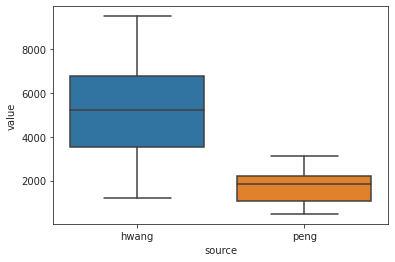

In [20]:
sns.boxplot(x=total_count_df['source'], y=total_count_df['value'])

In [21]:
for treatmentstatus1 in set(total_count_df.source):
    for treatmentstatus2 in set(total_count_df.source):
        if treatmentstatus1!=treatmentstatus2:
            data1 = total_count_df[(total_count_df.source==treatmentstatus1)]
            data2 = total_count_df[(total_count_df.source==treatmentstatus2)]
            U1, p = mannwhitneyu(data1['value'].values, data2['value'].values)
            if len(data2['value'].values) > 0 and len(data1['value'].values) > 0:
                print(treatmentstatus1, treatmentstatus2, U1, p)

hwang peng 65.0 1.9189983933242587e-09
peng hwang 65.0 1.9189983933242587e-09


In [22]:
total_df = total_df[total_df.variable!='Doublet']

In [23]:
counts = defaultdict(int)
for pid, val, source in zip(total_df['pid'], total_df.value ,total_df['source']):
    counts[(pid, source)] += val
    
total_df['total'] = [counts.get((pid, source)) for pid, val, source in zip(total_df['pid'], total_df.value ,total_df['source'])]
total_df['normed'] = total_df['value']/total_df['total']

In [24]:
from matplotlib import pyplot as plt

In [25]:
def dirichlet_multinomial(adata, celllabel, comp, ref):
    p2t = dict((p, t) for p, t in zip(adata.obs.pid, adata.obs.new_treatment))
    df = adata.obs.groupby(['pid', celllabel]).agg({'new_treatment':'first', 'total_counts':'count'}).reset_index()
    total = adata.obs.groupby(['pid', 'new_treatment']).agg({'total_counts':'count'}).to_dict()['total_counts']
    df['overall'] = [total.get((pid, treatment), 0) for pid, treatment in zip(df['pid'], df['new_treatment'])]
    df['new_treatment']= [p2t.get(p) for p in df['pid']]
    df = df[~df.overall.isna()]
    df['normalized'] = df['total_counts']/df['overall']
    df.columns = ['pid','cell_type','treatment','total_counts','overall','normalized']
    df = df.pivot(index='pid', columns='cell_type', values='total_counts')
    df.columns = list(df.columns)
    df = df.reset_index()

    data_all = dat.from_pandas(df, covariate_columns=["pid"])
    data_all.obs['treatment'] = [p2t.get(p) for p in data_all.obs.pid]
    data_all.obs.treatment
    data_all = data_all[data_all.obs["treatment"].isin(["Untreated", comp])]

    viz.boxplots(data_all, feature_name="treatment")
    model_salm = mod.CompositionalAnalysis(data_all, formula="treatment", reference_cell_type=ref)
    sim_results = model_salm.sample_hmc()
    display(sim_results.summary_extended(hdi_prob=0.9))
    display(sim_results.credible_effects())

In [26]:
total_df.to_csv('/ahg/regevdata/projects/Pancreas/src/data/peng/celltypes.tsv')

<ipython-input-27-e44b8f09dc51>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['normed'] = data1['normed'].fillna(0)
<ipython-input-27-e44b8f09dc51>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['normed'] = data2['normed'].fillna(0)
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


hwang peng Vascular smooth muscle 54.0 3.6245328926097e-10
peng hwang Vascular smooth muscle 54.0 3.6245328926097e-10
hwang peng Endocrine 324.0 0.006135090012267944
peng hwang Endocrine 324.0 0.00613509001226794
hwang peng Myeloid 300.0 0.002416063357531319
peng hwang Myeloid 300.0 0.002416063357531319
hwang peng Lymphoid 200.0 1.846871918675414e-05
peng hwang Lymphoid 200.0 1.8468719186754034e-05
hwang peng Epithelial (malignant) 418.0 0.1011594275039881
peng hwang Epithelial (malignant) 418.0 0.1011594275039881
hwang peng Pericyte 10.0 1.73858585809165e-11
peng hwang Pericyte 10.0 1.73858585809165e-11
hwang peng Epithelial (non-malignant) 481.0 0.32593631066298534
peng hwang Epithelial (non-malignant) 481.0 0.32593631066298534
hwang peng Endothelial 346.0 0.013328938348869931
peng hwang Endothelial 346.0 0.013328938348869931
hwang peng Cancer-associated fibroblast 284.0 0.0012339765259186258
peng hwang Cancer-associated fibroblast 284.0 0.0012339765259186258


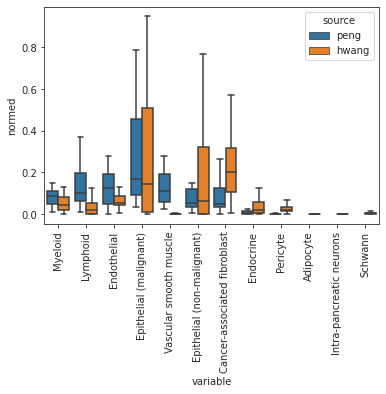

In [27]:
for topic in set(total_df['variable']):
    for treatmentstatus1 in set(total_df.source):
        for treatmentstatus2 in set(total_df.source):
            if treatmentstatus1!=treatmentstatus2:
                data1 = total_df[(total_df.source==treatmentstatus1)&(total_df['variable']==topic)]
                data2 = total_df[(total_df.source==treatmentstatus2)&(total_df['variable']==topic)]
                data1['normed'] = data1['normed'].fillna(0)
                data2['normed'] = data2['normed'].fillna(0)
                U1, p = mannwhitneyu(data1['normed'].values, data2['normed'].values)
                if len(data2['normed'].values) > 0 and len(data1['normed'].values) > 0:
                    print(treatmentstatus1, treatmentstatus2, topic, U1, p)
sns.boxplot(data=total_df, x='variable', y='normed', hue='source', showfliers=False)
plt.xticks(rotation=90)
plt.show()

#topic_dirichlet(total_df, 'variable', 'normed')

In [43]:
total_df['index'] = total_df.pid + '_' + total_df.source

/home/unix/kjag/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Zero counts encountered in data! Added a pseudocount of 0.5.
MCMC sampling finished. (178.829 sec)
Acceptance rate: 59.3%
Compositional Analysis summary (extended):

Data: 67 samples, 12 cell types
Reference index: 5
Formula: source
Spike-and-slab threshold: 0.625

MCMC Sampling: Sampled 20000 chain states (5000 burnin samples) in 178.829 sec. Acceptance rate: 59.3%

Intercepts:
                              Final Parameter  HDI 5%  HDI 95%     SD  \
Cell Type                                                               
Adipocyte                              -1.851  -2.059   -1.636  0.129   
Cancer-associated fibroblast            0.158  -0.061    0.336  0.125   
Endocrine                              -0.962  -1.175   -0.747  0.129   
Endothelial                            -0.283  -0.521   -0.038  0.153   
Epithelial (malignant)                 -0.219  -0.440   -0.021  0.129   
Epithelial (non-malignant)             -0.539  -0.714   -0.364  0.108   
Intra-pancreatic neurons          

/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/sccoda/util/result_classes.py:216: RuntimeWarning: Mean of empty slice.
  beta_nonzero_mean.append(beta_i_raw[beta_i_raw_nonzero].mean())
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/sccoda/util/result_classes.py:216: RuntimeWarning: Mean of empty slice.
  beta_nonzero_mean.append(beta_i_raw[beta_i_raw_nonzero].mean())
/home/unix/kjag/.conda/envs/pegasus/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


None

Covariate       Cell Type                   
source[T.peng]  Adipocyte                       False
                Cancer-associated fibroblast    False
                Endocrine                       False
                Endothelial                      True
                Epithelial (malignant)           True
                Epithelial (non-malignant)      False
                Intra-pancreatic neurons        False
                Lymphoid                         True
                Myeloid                          True
                Pericyte                         True
                Schwann                         False
                Vascular smooth muscle           True
Name: Inclusion probability, dtype: bool

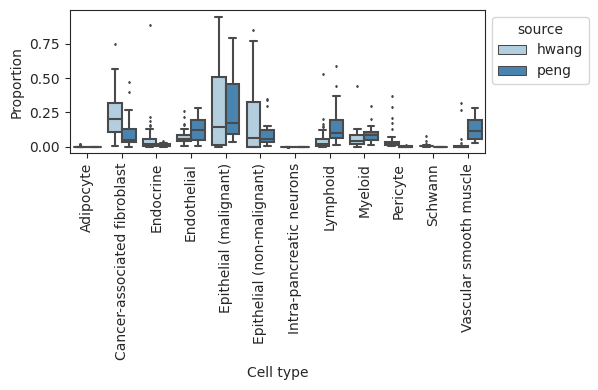

In [66]:
df = total_df.pivot(index='index', columns='variable', values='value')
df = df.fillna(0)
df.columns = list(df.columns)
df = df.reset_index()

i2source = dict([(i, i.split('_')[1]) for i in df['index']])

data_all = dat.from_pandas(df, covariate_columns=["index"])
data_all.obs['source'] = [i2source.get(i) for i in df['index']]

viz.boxplots(data_all, feature_name="source")
model_salm = mod.CompositionalAnalysis(data_all, formula="source", reference_cell_type='Epithelial (non-malignant)')
sim_results = model_salm.sample_hmc()
display(sim_results.summary_extended(hdi_prob=0.9))
display(sim_results.credible_effects())